타이타닉 튜토리얼 공부하기

참고 : https://kaggle-kr.tistory.com/17?category=868316#1_2

위 사이트를 참고하여 공부하였습니다.

- 이 튜토리얼에서 타이타닉에 탑승한 사람들의 신상정보를 활용하여 승선한 사람들의 생존 여부를 예측하는 모델을 생성할 것입니다.
- 이 튜토리얼에서 사용하는 것  
    - 시각화 도구 : matplotlib, seaborn, plotly
    - 데이터 분석 도구 : pandas, numpy 
    - 머신 러닝 도구 :sklearn

In [11]:
# 라이브러리 설치하기
import pandas as pd
import numpy as np  # 다차원 배열, 행렬 지원 : 수학 함수 모음 제공
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno # 데이터셋의 결측값 시각화
import warnings # 경고 메시지 제어
warnings.filterwarnings('ignore') # 코드 실행 중에 경고 메시지 표시 X
%matplotlib inline

- %matplotlib inline : Jupyter Notebook에서 사용되는 매직(magic)명령어 중 하나입니다. matplotlib의 그래프를 노트북 내에게 인라인으로 표시하는 역할을 합니다. 이 명령어를 실행하면 그래프를 그리는 코드 셀 다음에 작성된 matplotlib코드에 대한 출력이 즉시 표시됩니다.

# 1. Dataset 확인하기

In [12]:
df_train = pd.read_csv(r"C:\Users\yousb\Desktop\bincoding\Kaggle\train.csv", encoding="cp949")
df_test = pd.read_csv(r"C:\Users\yousb\Desktop\bincoding\Kaggle\test.csv", encoding= "cp949")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


여기서 feature는 Pclass, Age, SibSp, Parch, Fare이며 예측하려는 target label은 Survived입니다.
- pandas dataframe에는 describe()메소드가 있는데, 이를  쓰면 각 feature가 가진 통계치들을 반환해줍니다.

In [13]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 테이블을 보면 Passenser ID 숫자와 다른 null data가 존재하는 열(feature)가 있습니다. 
- 이를 좀 더 보기 편하게 그래프로 시각화해서 살펴봅니다.

## 1-1. Null data check

In [27]:
# 각 열에 대해 누락된 값의 백분율을 계산하여 해당 열의 이름과 백분율 출력하기
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value:{:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value:0.00%
column:   Survived	 Percent of NaN value:0.00%
column:     Pclass	 Percent of NaN value:0.00%
column:       Name	 Percent of NaN value:0.00%
column:        Sex	 Percent of NaN value:0.00%
column:        Age	 Percent of NaN value:19.87%
column:      SibSp	 Percent of NaN value:0.00%
column:      Parch	 Percent of NaN value:0.00%
column:     Ticket	 Percent of NaN value:0.00%
column:       Fare	 Percent of NaN value:0.00%
column:      Cabin	 Percent of NaN value:77.10%
column:   Embarked	 Percent of NaN value:0.22%


- {:>10} :  열 이름을 오른쪽 정렬하여 10자리 공간 확보
- {:.2f} : 백분율 소수점 둘째 자리까지 표시

In [16]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/ df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


Train, Test set 에서 Age(둘 다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data 존재하는 것을 볼 수 있습니다.

MANO라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있습니다.

<Axes: >

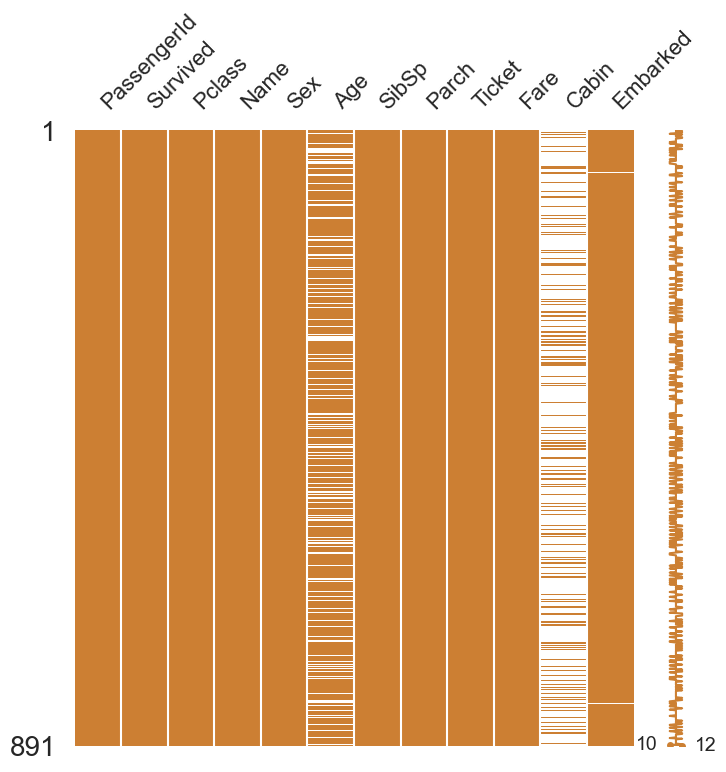

In [17]:
msno.matrix(df = df_train.iloc[:, :], figsize = (8,8), color = (0.8, 0.5, 0.2))

<Axes: >

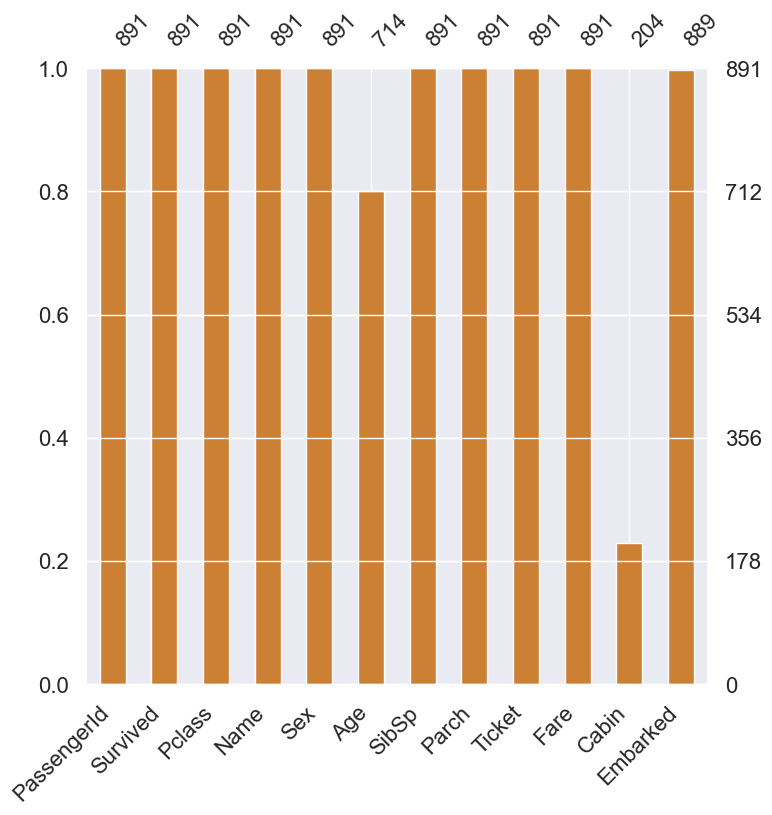

In [18]:
msno.bar(df = df_train.iloc[:, :], figsize = (8,8), color = (0.8, 0.5, 0.2))

## 1-2 Target label 확인
- target label이 어떤 distribution을 가지고 있는지 확인해봐야 합니다.
- 지금같은 binary classification 문제의 경우 1과 0의 분포가 어떠냐에 따라 모델의 평가방법이 달라질 수 있습니다.

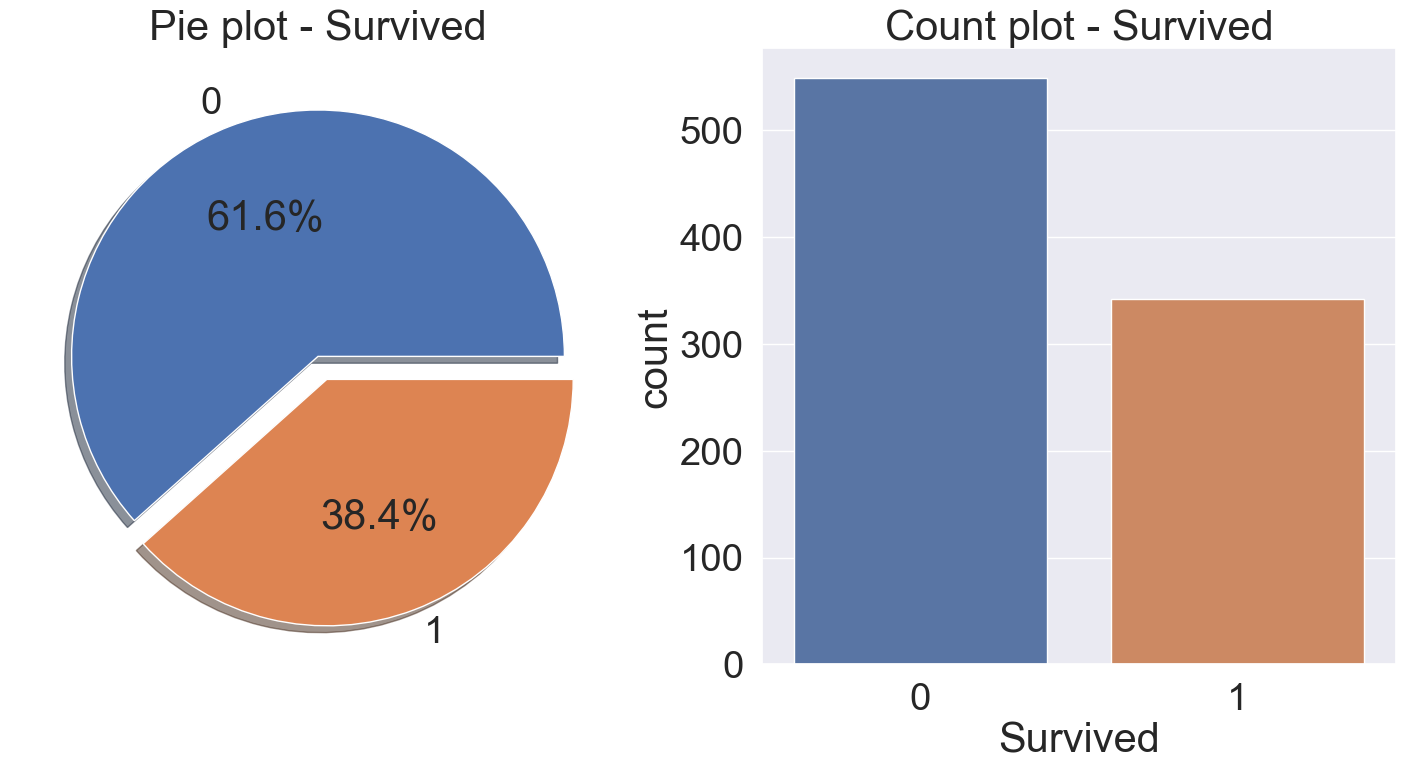

In [26]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data = df_train, ax = ax[1]) 
ax[1].set_title('Count plot - Survived')

plt.show()

- explode = [0, 0.1] : pie 두 번째 조각을 띄어서 강조
- autopct = '%1.1f%%'  각 조각에 표시되는 퍼센트 값을 소수점 첫째 자리까지 표시
- shadow = True : 그래프의 그림자 효과
- countplot() : 열 값에 대한 개수를 세어 막대 그래프로 표현

- 죽은 사람이 많습니다.
- 38.4%가 살아남았습니다.
- target label의 분포가 제법 균일(balanced)합니다.

다음 장에서는 데이터 분석을 해보도록 하겠습니다.